In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping 

In [41]:
df = pd.read_csv("data_final.csv",sep=';')
df.head()

,Title,Abstract
0,Prevention and management of peri-implant dise...,As more patients choose dental implants as the...
1,"Diabetes, Edentulism, and Cognitive Decline: A...",Diabetes mellitus (DM) is a recognized risk fa...
2,Tooth Loss and Caries Experience of Elderly Ch...,Risk factors associated with tooth loss have b...
3,Clinical outcomes of full-arch immediate fixed...,To retrospectively assess clinical and radiogr...
4,Periodontal diseases assessed by average bone ...,Periodontal disease often develops in patients...


In [45]:
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"Abstract" : "text2", "Title":"text"},inplace = True)
df

,text,text2
0,Prevention and management of peri-implant dise...,As more patients choose dental implants as the...
1,"Diabetes, Edentulism, and Cognitive Decline: A...",Diabetes mellitus (DM) is a recognized risk fa...
2,Tooth Loss and Caries Experience of Elderly Ch...,Risk factors associated with tooth loss have b...
3,Clinical outcomes of full-arch immediate fixed...,To retrospectively assess clinical and radiogr...
4,Periodontal diseases assessed by average bone ...,Periodontal disease often develops in patients...
...,...,...
289,The journey of gastric phytobezoar followed by...,Phytobezoars are a rare cause of intestinal ob...
290,Determinants of protein-energy malnutrition in...,Protein-energy malnutrition is associated with...
291,Prosthetic rehabilitation of an edentulous pat...,It is difficult today to find older patients w...
292,T-bar clasp-retained removable partial denture...,This article reports the case of a 55-year-old...


In [46]:
df.insert(2, "label", [0, 0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 
                        0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], True)

In [47]:
df.to_csv("data.csv", index=False)

In [48]:
df = pd.read_csv("data.csv")
df

,text,text2,label
0,Prevention and management of peri-implant dise...,As more patients choose dental implants as the...,0
1,"Diabetes, Edentulism, and Cognitive Decline: A...",Diabetes mellitus (DM) is a recognized risk fa...,0
2,Tooth Loss and Caries Experience of Elderly Ch...,Risk factors associated with tooth loss have b...,0
3,Clinical outcomes of full-arch immediate fixed...,To retrospectively assess clinical and radiogr...,0
4,Periodontal diseases assessed by average bone ...,Periodontal disease often develops in patients...,0
...,...,...,...
289,The journey of gastric phytobezoar followed by...,Phytobezoars are a rare cause of intestinal ob...,1
290,Determinants of protein-energy malnutrition in...,Protein-energy malnutrition is associated with...,1
291,Prosthetic rehabilitation of an edentulous pat...,It is difficult today to find older patients w...,1
292,T-bar clasp-retained removable partial denture...,This article reports the case of a 55-year-old...,1


In [7]:
def cleansing(text):
    ext = str(text)
    print(text)
    
    text =  text.lower() 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub("\n", " ", text)
    text = re.sub('(s{2,})', ' ', text)
    text = text
    
    return text

In [49]:
def perform_oversampling(df):
    df_non = df[df['label'] == 1]
    df_exclude = df[df['label'] == 0]
    df_low_oversampled = df_exclude.sample(df_non.shape[0], replace=True)
    return pd.concat([df_low_oversampled, df_non], axis=0)

print('Original data:')
print(df['label'].value_counts())

df_balanced = perform_oversampling(df)

print('-'*10)
print('After oversampling:')
print(df_balanced['label'].value_counts())

Original data:
0    270
1     24
Name: label, dtype: int64
----------
After oversampling:
0    24
1    24
Name: label, dtype: int64


In [9]:
df['text'] = df['text'].apply(cleansing)
df.head()

Prevention and management of peri-implant disease.
Diabetes, Edentulism, and Cognitive Decline: A 12-Year Prospective Analysis.
Tooth Loss and Caries Experience of Elderly Chileans in the Context of the COVID-19 Pandemic in Five Regions of Chile.
Clinical outcomes of full-arch immediate fixed prostheses supported by two axial and two tilted implants: A retrospective cohort study with 12-15 years of follow-up.
Periodontal diseases assessed by average bone resorption are associated with microvascular complications in patients with type 2 diabetes.
Comparative Analysis of Edentulism in a Sample of Mexican Adults with and without Type 2 Diabetes.
Effects of wearing removable dentures and aging on palatal mucosa blood flow by laser doppler.
The impact of implant-retained overdentures on type-2 diabetic and non-diabetic edentulous patients: Satisfaction and quality of life in a prospective cohort study.
Full Arch Implant-Prosthetic Rehabilitation in Patients with Type I Diabetes Mellitus: Re

,text,text2,label
0,prevention and management of peri implant dise...,As more patients choose dental implants as the...,0
1,diabetes edentulism and cognitive decline a...,Diabetes mellitus (DM) is a recognized risk fa...,0
2,tooth lo and caries experience of elderly chi...,Risk factors associated with tooth loss have b...,0
3,clinical outcomes of full arch immediate fixed...,To retrospectively assess clinical and radiogr...,0
4,periodontal diseases a e ed by average bone re...,Periodontal disease often develops in patients...,0


In [88]:
#testing with Title 

x_train, x_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['label'], test_size=0.2, random_state=434) 

In [89]:
max_len = 1000 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 5000

In [90]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [91]:
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

264

In [92]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [93]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [94]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape) 

Shape of training tensor:  (38, 1000)
Shape of testing tensor:  (10, 1000)


In [95]:
vocab_size = 5000
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid')) 

In [96]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(1, activation='sigmoid')) 

In [97]:
model2.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 1000, 16)          80000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              148480    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 228,737
Trainable params: 228,737
Non-trainable params: 0
_________________________________________________________________


In [98]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy']) 

In [99]:
num_epochs = 4
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2) 

Epoch 1/4
2/2 - 7s - loss: 0.6947 - accuracy: 0.4474 - val_loss: 0.6962 - val_accuracy: 0.4000 - 7s/epoch - 3s/step
Epoch 2/4
2/2 - 3s - loss: 0.6921 - accuracy: 0.5263 - val_loss: 0.6948 - val_accuracy: 0.4000 - 3s/epoch - 1s/step
Epoch 3/4
2/2 - 3s - loss: 0.6910 - accuracy: 0.5263 - val_loss: 0.6933 - val_accuracy: 0.4000 - 3s/epoch - 1s/step
Epoch 4/4
2/2 - 3s - loss: 0.6906 - accuracy: 0.6579 - val_loss: 0.6925 - val_accuracy: 0.7000 - 3s/epoch - 1s/step


In [22]:
model2.save('model_bilstm') 

INFO:tensorflow:Assets written to: model_bilstm\assets


INFO:tensorflow:Assets written to: model_bilstm\assets


In [100]:
print(f"Bi-LSTM model loss and accuracy: {model2.evaluate(testing_padded, y_test)} " ) 

1/1 [==============================] - 0s 310ms/step - loss: 0.6925 - accuracy: 0.7000
Bi-LSTM model loss and accuracy: [0.692520797252655, 0.699999988079071] 


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import numpy as np 

y_predict = np.where(model2.predict(testing_padded)> 0.5,1,0)
print(classification_report(y_test, y_predict))

1/1 [==============================] - 1s 852ms/step
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.67      1.00      0.80         6

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



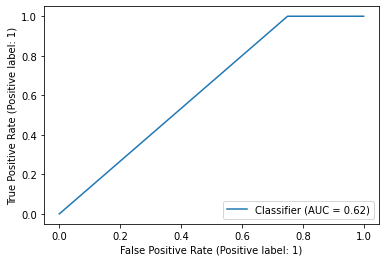

In [102]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_predict) 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df['text2'], df['label'], test_size=0.2, random_state=434) 

In [29]:
max_len = 1000 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 5000

In [30]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [31]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [32]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [33]:
vocab_size = 5000
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid')) 

In [34]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(1, activation='sigmoid')) 

In [35]:
model2.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 16)          80000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              148480    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 228,737
Trainable params: 228,737
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy']) 

In [37]:
num_epochs = 4
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2) 

Epoch 1/4
8/8 - 15s - loss: 0.6292 - accuracy: 0.8681 - val_loss: 0.3686 - val_accuracy: 0.9322 - 15s/epoch - 2s/step
Epoch 2/4
8/8 - 11s - loss: 0.4296 - accuracy: 0.9149 - val_loss: 0.2475 - val_accuracy: 0.9322 - 11s/epoch - 1s/step
Epoch 3/4
8/8 - 10s - loss: 0.3042 - accuracy: 0.9149 - val_loss: 0.2869 - val_accuracy: 0.9322 - 10s/epoch - 1s/step
Epoch 4/4
8/8 - 10s - loss: 0.3007 - accuracy: 0.9149 - val_loss: 0.2491 - val_accuracy: 0.9322 - 10s/epoch - 1s/step


In [38]:
print(f"Bi-LSTM model loss and accuracy: {model2.evaluate(testing_padded, y_test)} " ) 

2/2 [==============================] - 1s 258ms/step - loss: 0.2491 - accuracy: 0.9322
Bi-LSTM model loss and accuracy: [0.2491304725408554, 0.9322034120559692] 
